In [1]:

import numpy as np
import pandas as pd

In [57]:
# Reading the given train_data.csv using the .read_csv function of pandas
train_path='train_data.csv'
train_data=pd.read_csv( train_path , sep=':::',engine='python',names=['Title','Genre','Description'])
train_data.head()

,Title,Genre,Description
"""1",Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
"""2",Cupid (1997),thriller,A brother and sister with a past incestuous r...
"""3","Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
"""4",The Secret Sin (1915),drama,To help their unemployed father make ends mee...
"""5",The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [58]:
# Reading the given test_data.csv using the .read_csv function of pandas
test_path='test_data.csv'
test_data=pd.read_csv( test_path , sep=':::',engine='python',names=['ID', 'Title','Description'])
test_data.head()

,ID,Title,Description
0,"""1",Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,"""2",La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,"""3",Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,"""4",Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,"""5",Er nu zhai (1955),Before he was known internationally as a mart...


In [59]:
# Insights about our dataset
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [60]:
# Gathering some more information about our dataset!
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, "1  to "54214 
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [61]:
# Checking if there are any null value, if there will be any null value we will remove it using the .drop method, but there are'nt any null value hence we will process further!
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [62]:
# Importing libraries for ploting graphs for further classification!
import matplotlib.pyplot as plt
import seaborn as sns
import string

Text(0.5, 1.0, 'Distribution of Genres')

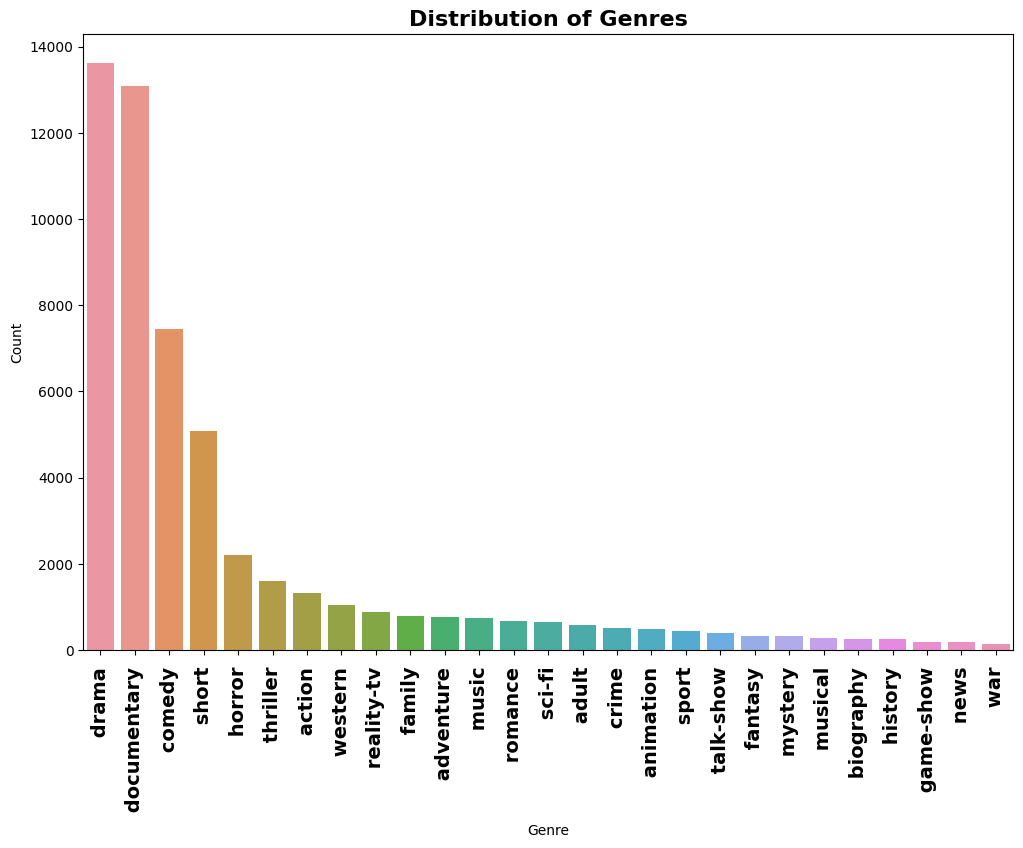

In [63]:
# Plotting graph for count vs genres, to look at which genre movie is more in numbers in given dataset and it turned out to be that drama and documentry
# are the two genre which are most in numbers and war genre movie are the least
plt.figure(figsize=(12,8))                                      # Adjustin size of the graph
counts = train_data.Genre.value_counts()                        # counting how many genres are there in the train_data dataset and hence there are 27 genres
sns.barplot(x=counts.index, y=counts, orient='v')
plt.xlabel('Genre')                                             # Genre will be on x axis
plt.ylabel('Count')                                             # Count will be on y axis
plt.xticks(rotation=90, fontsize=14, fontweight='bold')         # Graph rotation
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')         # Giving a title to the graph plotted!

In [64]:
train_data['length']=train_data['Description'].apply(len)
train_data.head()


,Title,Genre,Description,length
"""1",Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,547
"""2",Cupid (1997),thriller,A brother and sister with a past incestuous r...,185
"""3","Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,653
"""4",The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1083
"""5",The Unrecovered (2007),drama,The film's title refers not only to the un-re...,626


In [66]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
# Creating a function for the cleaning of all the description for the further model building purposes!
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()                                  # lower-case all characters
    text = re.sub('-',' ',text.lower())                  # replacing `word-word` as `word word`
    text = re.sub(f'[{string.digits}]',' ',text)         # removing digits
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])  # remove stopwords and stem other words
    text =  re.sub(r'@\S+', '',text)                     # removing twitter handles
    text =  re.sub(r'http\S+', '',text)                  # removing urls
    text =  re.sub(r'pic.\S+', '',text) 
    text =  re.sub(r"[^a-zA-Z+']", ' ',text)             # only keeps characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ')      # keeping words with length>1 only
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    stopwords = nltk.corpus.stopwords.words('english')   # removing stopwords
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])
    text = re.sub("\s[\s]+", " ",text).strip()            # removing repeated/leading/trailing spaces
    return re.sub(f'[{re.escape(string.punctuation)}]','',text) # removing punctuations


# Test your cleaning function
input_text = "Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38"
print(f'Original text: {input_text}')
print(f'Cleaned text: {clean_text(input_text)}')

Original text: Certainly you get a dramatic boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38
Cleaned text: certain get dram boost hello bye iem


In [68]:
# Passing both train_data and test_data into the clean_text function
train_data['Text_cleaning'] = train_data.Description.apply(clean_text)
test_data['Text_cleaning'] = test_data.Description.apply(clean_text)

train_data.head()

,Title,Genre,Description,length,Text_cleaning
"""1",Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,547,list convers doct parents year old osc learn n...
"""2",Cupid (1997),thriller,A brother and sister with a past incestuous r...,185,broth sist past incestu rel cur murd relations...
"""3","Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,653,bus empty stud field trip muse nat history lit...
"""4",The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1083,help unemploy fath mak end meet edi twin sist ...
"""5",The Unrecovered (2007),drama,The film's title refers not only to the un-re...,626,films titl ref recov body ground zero also sta...


In [69]:
# Creating another column for length of the clean data text
train_data['length_Text_cleaning']=train_data['Text_cleaning'].apply(len)
train_data.head()


,Title,Genre,Description,length,Text_cleaning,length_Text_cleaning
"""1",Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,547,list convers doct parents year old osc learn n...,324
"""2",Cupid (1997),thriller,A brother and sister with a past incestuous r...,185,broth sist past incestu rel cur murd relations...,83
"""3","Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,653,bus empty stud field trip muse nat history lit...,325
"""4",The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1083,help unemploy fath mak end meet edi twin sist ...,616
"""5",The Unrecovered (2007),drama,The film's title refers not only to the un-re...,626,films titl ref recov body ground zero also sta...,282


In [71]:
(train_data['length_Text_cleaning']>2000).value_counts()

length_Text_cleaning
False    54131
True        83
Name: count, dtype: int64

In [72]:
# Removing extremely long descriptions: outliers
print('Dataframe size (before removal): ',len(train_data))  # Printing length of the train data before removing outliers
filt=train_data['length_Text_cleaning']>2000
train_data.drop(train_data[filt].index,axis=0,inplace=True) # filter rows having cleaned description length > 2000
print('Dataframe size (after removal): ',len(train_data))   # Printing length of the train data before removing outliers
print(f'Removed rows: {filt.sum()}')

Dataframe size (before removal):  54214
Dataframe size (after removal):  54131
Removed rows: 83


In [74]:
num_words = 50000
max_len = 250
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(train_data['Text_cleaning'].values)

In [75]:
# Reading test_data_solution and creating a dataframe for it too
test_path='test_data_solution.csv'
test_data_solution=pd.read_csv( test_path , sep=':::',engine='python',names=['ID','Title','Genre','Description'])
test_data_solution.head()

,ID,Title,Genre,Description
0,"""1",Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,"""2",La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,"""3",Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,"""4",Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,"""5",Er nu zhai (1955),drama,Before he was known internationally as a mart...


In [76]:
X = tokenizer.texts_to_sequences(train_data['Text_cleaning'].values)
X = pad_sequences(X, maxlen=max_len)
y = pd.get_dummies(train_data['Genre']).values

X_test = tokenizer.texts_to_sequences(test_data['Text_cleaning'].values)
X_test = pad_sequences(X_test, maxlen=max_len)
y_test = pd.get_dummies(test_data_solution['Genre']).values

In [111]:
for x in test_data_solution['Genre'].values:
    if(x==8):
        print(x)

In [77]:
EMBEDDING_DIM = 100
model = Sequential()
model.add(Embedding(num_words, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2)) # Using Long short term memory model to check on some long term dependencies on the data!
model.add(Dense(27, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:
my_callbacks  = [EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=2,
                               mode='auto')]
history = model.fit(X, y, epochs=6, batch_size=32,validation_data=(X_test,y_test), callbacks=my_callbacks)

Epoch 1/6
1692/1692 [==============================] - 881s 518ms/step - loss: 1.9607 - accuracy: 0.4292 - val_loss: 1.7101 - val_accuracy: 0.5056
Epoch 2/6
1692/1692 [==============================] - 687s 406ms/step - loss: 1.4567 - accuracy: 0.5792 - val_loss: 1.5609 - val_accuracy: 0.5461
Epoch 3/6
1692/1692 [==============================] - 665s 393ms/step - loss: 1.1297 - accuracy: 0.6731 - val_loss: 1.5835 - val_accuracy: 0.5490
Epoch 4/6
1692/1692 [==============================] - 659s 390ms/step - loss: 0.8578 - accuracy: 0.7506 - val_loss: 1.7481 - val_accuracy: 0.5334


In [85]:
import joblib

In [86]:
joblib.dump(model,'GenreClass.pkl')

['GenreClass.pkl']

In [87]:
nwmod = joblib.load('GenreClass.pkl')

In [91]:
agg = nwmod.predict(X_test)

1694/1694 [==============================] - 104s 61ms/step


In [117]:
print(np.argmax(agg[7]))
print(np.argmax(agg[10074]))

5
8
